In [56]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Проблема качества данных</b></h3>

#  Домашнее задание

### Задание  
    
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.
        a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
        b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.
        a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. *Попробуйте математически преобразовать признак Age.
10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
11. Сформулируйте выводы по проделанной работе.
        a) Кратко опишите какие преобразования были сделаны и почему.
        b) Сравните метрики моделей из п. 2 и п. 10.
        c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

In [57]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

##### 1. Загрузила данные.

In [58]:
titanic = pd.read_csv('train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [59]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


######  2. Удалию все пропущенные значения и категориальные переменные. 

In [60]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
# Удаляем столбец 'Cabin' из-за большого количества пропусков
titanic = titanic.drop('Cabin',axis=1)

In [62]:
# Удаляем все оставшиеся пропуски в столбцах "Age", "Embarked"
titanic.dropna(inplace=True)

In [63]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


In [64]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [65]:
# Удаляем столбцы которые не важны для обучения
del titanic['PassengerId'], titanic['Name'], titanic['Ticket']

In [66]:
titanic['Sex'].replace(['female','male'],[0,1], inplace=True)

In [67]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [68]:
titanic = pd.get_dummies( titanic, columns = ['Embarked'] )
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


##### 2. Обучаю модель. Считаю метрики качества.

In [69]:
X = titanic[titanic.columns[1:]]
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0


In [70]:
y = titanic['Survived']
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [73]:
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        91
           1       0.65      0.71      0.68        52

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.74       143
weighted avg       0.76      0.76      0.76       143



##### 3. Снова загружаю данные.

In [74]:
titanic = pd.read_csv('train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### 4. Удаляю признаки, которые логически не нужны для построения модели. 

In [75]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
print(f'Процент пропущенных данных в столбце "Cabin" : {687/891:.0%}')

Процент пропущенных данных в столбце "Cabin" : 77%


In [77]:
# Удаляем столбец 'Cabin' из-за большого количества пропусков. 
# Столбец с номером каюты, не несет полезной информации 

titanic = titanic.drop('Cabin',axis=1)

In [78]:
len(titanic['Ticket'].unique())

681

In [79]:
# Удаляем столбцы которые не важны для обучения, не несут полезной информации

del titanic['PassengerId'], titanic['Name'], titanic['Ticket']

##### 5. Проверю данные на наличие пропущенных значений.

In [80]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

    a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [81]:
print(f'Процент пропущенных данных в столбце "Age" : {177/891:.0%}')
print(f'Процент пропущенных данных в столбце "Embarked" : {2/891:.1%}')

Процент пропущенных данных в столбце "Age" : 20%
Процент пропущенных данных в столбце "Embarked" : 0.2%


     b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [82]:
# Заполняем пропуски:

In [83]:
# В разных классах были пассажиры разного возраста. Заполним пропуски 'Age',
# относительно среднего возраста по полу и классу.

titanic['Age'].fillna(titanic.groupby(['Sex', 'Pclass'])['Age'].transform('median'), inplace=True)

In [84]:
# Поскольку у «Embarked» было только два пропущенных значения и наибольшее количество пассажиров 
# отправлялось из Southampton, вероятность посадки в Southampton выше. Заполняем модой.
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [85]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##### 6. Категориальные переменные перевожу в цифровые значения. 

In [86]:
titanic['Sex'].replace(['female','male'],[0,1], inplace=True)

In [87]:
titanic = pd.get_dummies( titanic, columns = ['Embarked'] )
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


##### 7. Проверяю данные на наличие выбросов.
     a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

<AxesSubplot:ylabel='Age'>

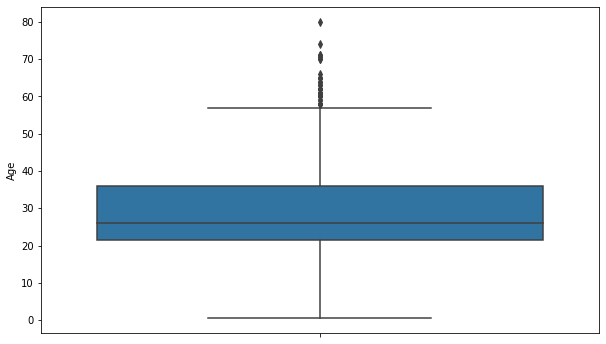

In [88]:
sns.boxplot( y=titanic["Age"] )

<AxesSubplot:ylabel='Fare'>

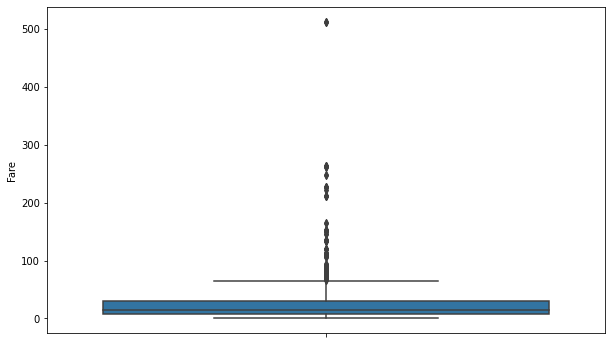

In [89]:
sns.boxplot( y=titanic["Fare"] )

In [90]:
# Выбросов по возрасту нет, 80 летний вполне мог являться пассажиром Титаника
# Выбросов в пассажирском тарифе тоже можно исключить, так как высокая цена могла быть обусловленна супер-пупер Люксом.

###### 8. *Постройте 1-2 графика на выбор. 

        *** Этот датасет подробно разобрала на курсе по статистике:
        графики взяла из своей домашней работы =)
    https://github.com/natkhosh/pyda_homeworks/blob/master/04_Statistic_in_Python/02_Visualization/visualization.ipynb

Text(0.5, 1.0, 'Распределение пассажиров по возрасту и по классу ')

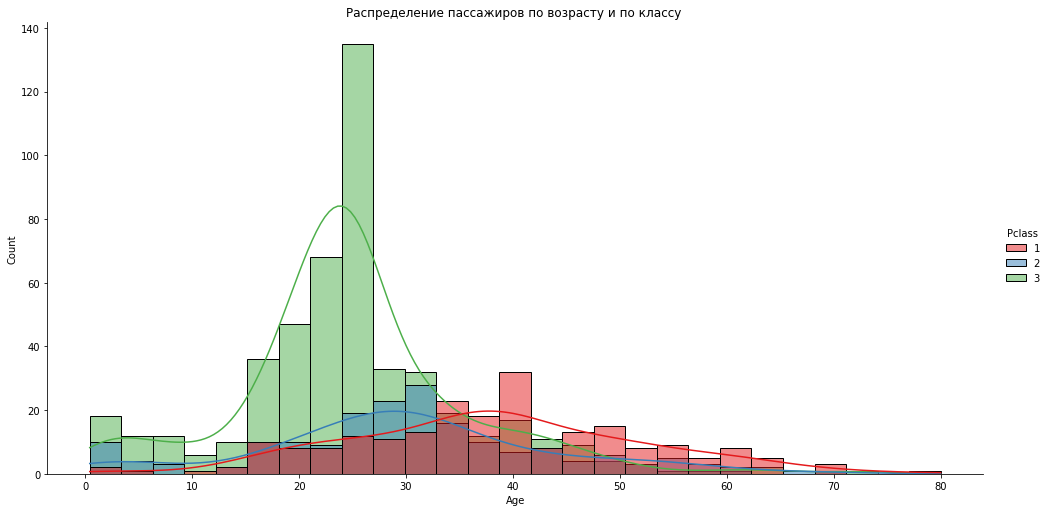

In [91]:
sns.displot(x=titanic['Age'], hue=titanic['Pclass'], palette='Set1', height=7, aspect=2, kde=True)
plt.title('Распределение пассажиров по возрасту и по классу ')

In [92]:
# Изначально мужчин было больше на корабле и по идеи число выживших мужчин должно было быть больше.  
# Но из-за того что в первую очередь эвакуировали детей и женщин, баланс вышивших сместился в сторону вторых.

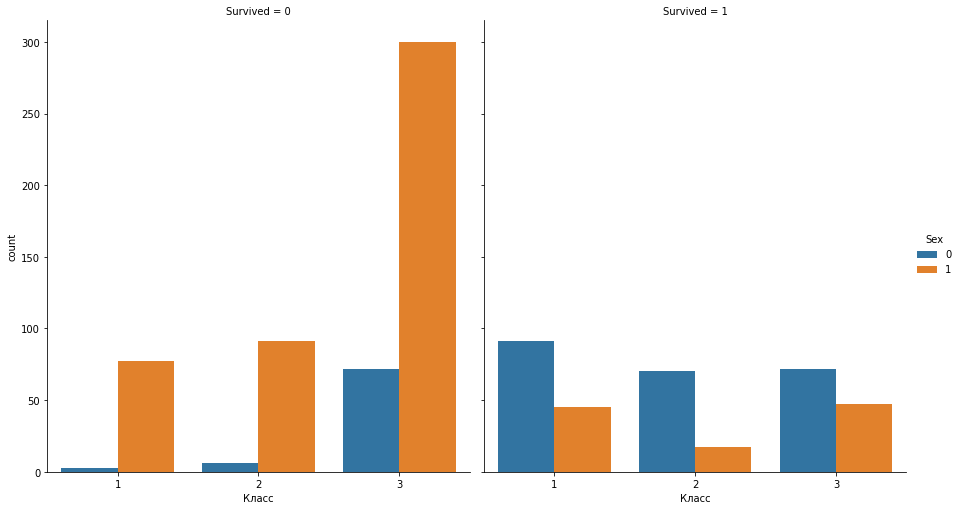

In [93]:
# Чем выше класс билета тем больше выживших. Это связано с размещение кают
#  (каюты первого класса находились на верхних палубах)

catp = sns.catplot(x="Pclass", hue="Sex", col="Survived", data=titanic, kind="count",
                height=7, aspect=.9)
catp.set_axis_labels("Класс")

###### 9. *Попробуйте математически преобразовать признак Age.

#### Логарифмическое преобразование
Логарифмическое преобразование – одно из наиболее часто используемых во время построения признаков математических преобразований.

Оно помогает обрабатывать искаженные данные, и после преобразования распределение становится более приближенным к нормальному.
В большинстве случаев порядок величины данных изменяется в пределах диапазона данных. Например, разница между возрастом от 15 до 20 лет не равна возрасту от 65 до 70 лет, так как по всем остальным аспектам разница в 5 лет в молодом возрасте означает большую разницу в величине. Этот тип данных поступает в результате мультипликативного процесса, и логарифмическое преобразование нормализует подобные различия величин.
Это также снижает влияние выбросов за счет нормализации разницы величин, и модель становится более надежной.

In [94]:
titanic['log'] = (titanic['Age']-titanic['Age'].min()+1) .transform(np.log)

In [95]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,log
0,0,3,1,22.0,1,0,7.2500,0,0,1,3.117065
1,1,1,0,38.0,1,0,71.2833,1,0,0,3.652734
2,1,3,0,26.0,0,0,7.9250,0,0,1,3.280159
3,1,1,0,35.0,1,0,53.1000,0,0,1,3.571784
4,0,3,1,35.0,0,0,8.0500,0,0,1,3.571784


###### 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [96]:
X = titanic[titanic.columns[1:]]
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,log
0,3,1,22.0,1,0,7.2500,0,0,1,3.117065
1,1,0,38.0,1,0,71.2833,1,0,0,3.652734


In [97]:
y = titanic['Survived']
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [100]:
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       116
           1       0.89      0.76      0.82        63

    accuracy                           0.88       179
   macro avg       0.88      0.86      0.87       179
weighted avg       0.88      0.88      0.88       179



### ВЫВОДЫ: 
Разница между моделями, в 177 значений данных возраста пассажиров это 20% от общего объема. 
Чем больше данных тем теоретически модель лучше обучается.

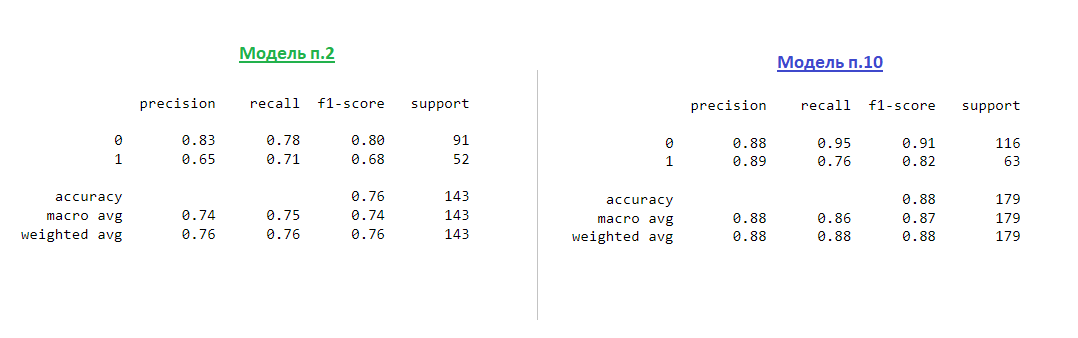